In [98]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from pathlib import Path
from ipywidgets import interact

In [99]:
df = pd.read_csv(r'C:\Users\ruale\Downloads\COVID.csv')

In [100]:
df.rename(columns={'location': "Country"}, inplace=True)

In [101]:
covid_data = df.groupby("Country")['new_cases','new_deaths','total_cases','total_deaths'].sum().reset_index()

C:\Users\ruale\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [102]:
top_6= covid_data.sort_values(by=['total_deaths'], ascending=False).head(6)

In [103]:
##Plotting the top 6 countries with the highest number of deaths using seaborn barplot

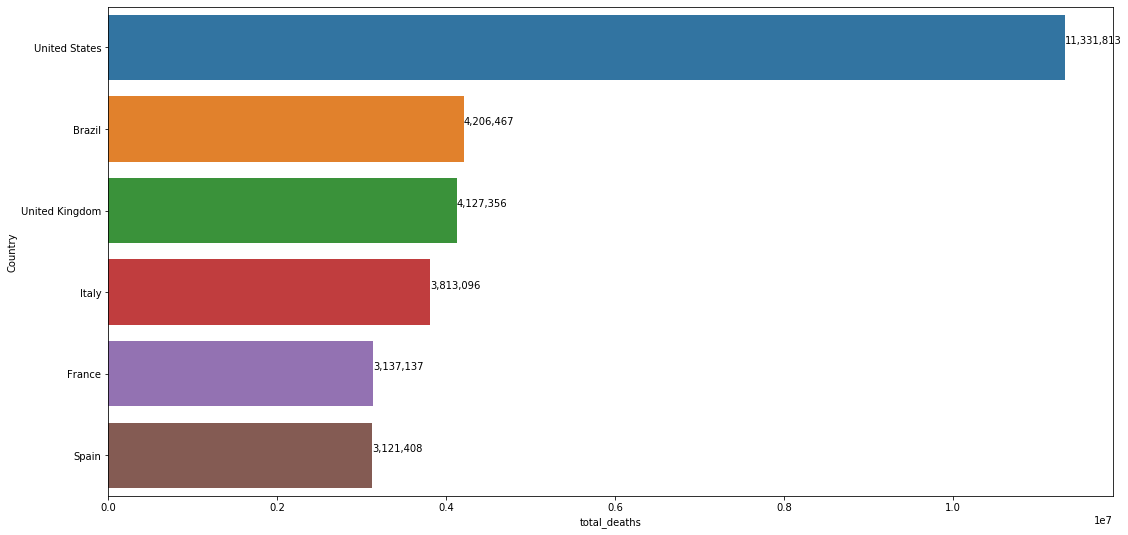

In [104]:
### Generate a Barplot
plt.figure(figsize=(18,9))
plot = sns.barplot(top_6['total_deaths'], top_6['Country'])
for i,(value,name) in enumerate(zip(top_6['total_deaths'],top_6['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

In [105]:
## Interactive Visualization of New cases per Country using plotly 

In [106]:
figure = px.choropleth(covid_data, locations="Country", locationmode="country names", color="new_cases",
                       hover_name="Country", color_continuous_scale="Viridis", range_color=[1,1000000])
figure.update_layout(title_text = 'Countries with new cases', geo = dict(projection={'type':'orthographic'}))
figure.show()

In [107]:
figure = px.choropleth(covid_data, locations="Country", locationmode="country names", color="total_deaths",
                       hover_name="Country", color_continuous_scale="Viridis", range_color=[1,1000000])
figure.update_layout(title_text = 'Countries total deaths', geo = dict(projection={'type':'orthographic'}))
figure.show()

In [108]:
global_data = covid_data.copy().drop(['Country'], axis =1)
global_summary = pd.DataFrame(global_data.sum()).transpose()
global_summary.style.format("{:,.0f}")

,new_cases,new_deaths,total_cases,total_deaths
0,"16,914,757","654,761","851,567,329","44,090,117"


In [109]:
covid_data.sort_values('new_cases', ascending=False).style.bar(align="left", width=98,color='#d65f5f')

,Country,new_cases,new_deaths,total_cases,total_deaths
181,United States,4495014.000000,152070.000000,237421936.000000,11331813.000000
26,Brazil,2610102.000000,91263.000000,97147305.000000,4206467.000000
82,India,1638870.000000,35747.000000,45646763.000000,1216237.000000
143,Russia,834499.000000,13802.000000,47960694.000000,661598.000000
159,South Africa,482169.000000,7812.000000,12581808.000000,204552.000000
113,Mexico,416179.000000,46000.000000,16173533.000000,1865215.000000
136,Peru,407492.000000,19021.000000,20477435.000000,709243.000000
38,Chile,353536.000000,9377.000000,17215972.000000,350918.000000
180,United Kingdom,302301.000000,45999.000000,27274634.000000,4127356.000000
162,Spain,288522.000000,28445.000000,28753517.000000,3121408.000000


In [110]:
fig = px.scatter_geo(df, locations="country_code", color="continent",
                     hover_name="Country", size="total_deaths",
                     projection="natural earth")
fig.show()


In [111]:
{
  "extensions": {
    "jupyter_dashboards": {
      "version": 1,
      "views": {
        "grid_default": {
          "col": 0,
          "height": 15,
          "hidden": false,
          "row": 9,
          "width": 4
        },
        "report_default": {}
      }
    }
  },
  "trusted": false
}

NameError: name 'false' is not defined